In [71]:
import pandas as pd

In [74]:
df = pd.read_csv('/Users/alessia/Desktop/LUISS/2024_2025/Python/LabDS/datasetunicef 2.csv')

In [75]:
# Check for missing values and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Countries and regions                                           215 non-null    object 
 1   Population (Total)                                              215 non-null    float64
 2   Population (Under18)                                            214 non-null    float64
 3   Population (Under 5)                                            214 non-null    float64
 4   Annual population growth rate (2000-2020)                       215 non-null    float64
 5   Annual population growth rate (2020-2030)                       215 non-null    float64
 6   Annual number of births (thousands)                             215 non-null    float64
 7   Total fertility (live births per woman)              

In [76]:

# Show basic statistics to identify data ranges, means, and outliers
print(df.describe())

       Population (Total)  Population (Under18)  Population (Under 5)  \
count        2.150000e+02          2.140000e+02            214.000000   
mean         1.248755e+05          3.941525e+04          11242.899470   
std          6.049711e+05          1.852144e+05          52318.665456   
min          5.110000e-01          6.035000e-01              0.144000   
25%          1.754192e+03          4.795627e+02            139.933250   
50%          9.578167e+03          2.532873e+03            728.607750   
75%          3.522708e+04          1.247775e+04           3527.774750   
max          7.909295e+06          2.392419e+06         671477.300000   

       Annual population growth rate (2000-2020)  \
count                                 215.000000   
mean                                    1.317323   
std                                     1.224692   
min                                    -1.527557   
25%                                     0.481066   
50%                           

In [77]:
# Check for missing values
print(df.isnull().sum())


Countries and regions                                              0
Population (Total)                                                 0
Population (Under18)                                               1
Population (Under 5)                                               1
Annual population growth rate (2000-2020)                          0
Annual population growth rate (2020-2030)                          0
Annual number of births (thousands)                                0
Total fertility (live births per woman)                            0
Life expectancy at birth (1970)                                    0
Life expectancy at birth (2000)                                    0
Life expectancy at birth (2021)                                    0
Dependency ratio (total)                                           1
Dependency ratio (child)                                           1
Dependency ratio (old age)                                         1
Share of urban population (%)     

In [79]:
# Drop rows with any missing values
df = df.dropna()

# Check if the missing values were removed
print(df.isnull().sum())  # This should show 0 for all columns now



Countries and regions                                             0
Population (Total)                                                0
Population (Under18)                                              0
Population (Under 5)                                              0
Annual population growth rate (2000-2020)                         0
Annual population growth rate (2020-2030)                         0
Annual number of births (thousands)                               0
Total fertility (live births per woman)                           0
Life expectancy at birth (1970)                                   0
Life expectancy at birth (2000)                                   0
Life expectancy at birth (2021)                                   0
Dependency ratio (total)                                          0
Dependency ratio (child)                                          0
Dependency ratio (old age)                                        0
Share of urban population (%)                   

In [80]:
# Example: Convert a column to numeric if it is being interpreted as a string
df['Population (Total)'] = pd.to_numeric(df['Population (Total)'], errors='coerce')  # Convert to numeric


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


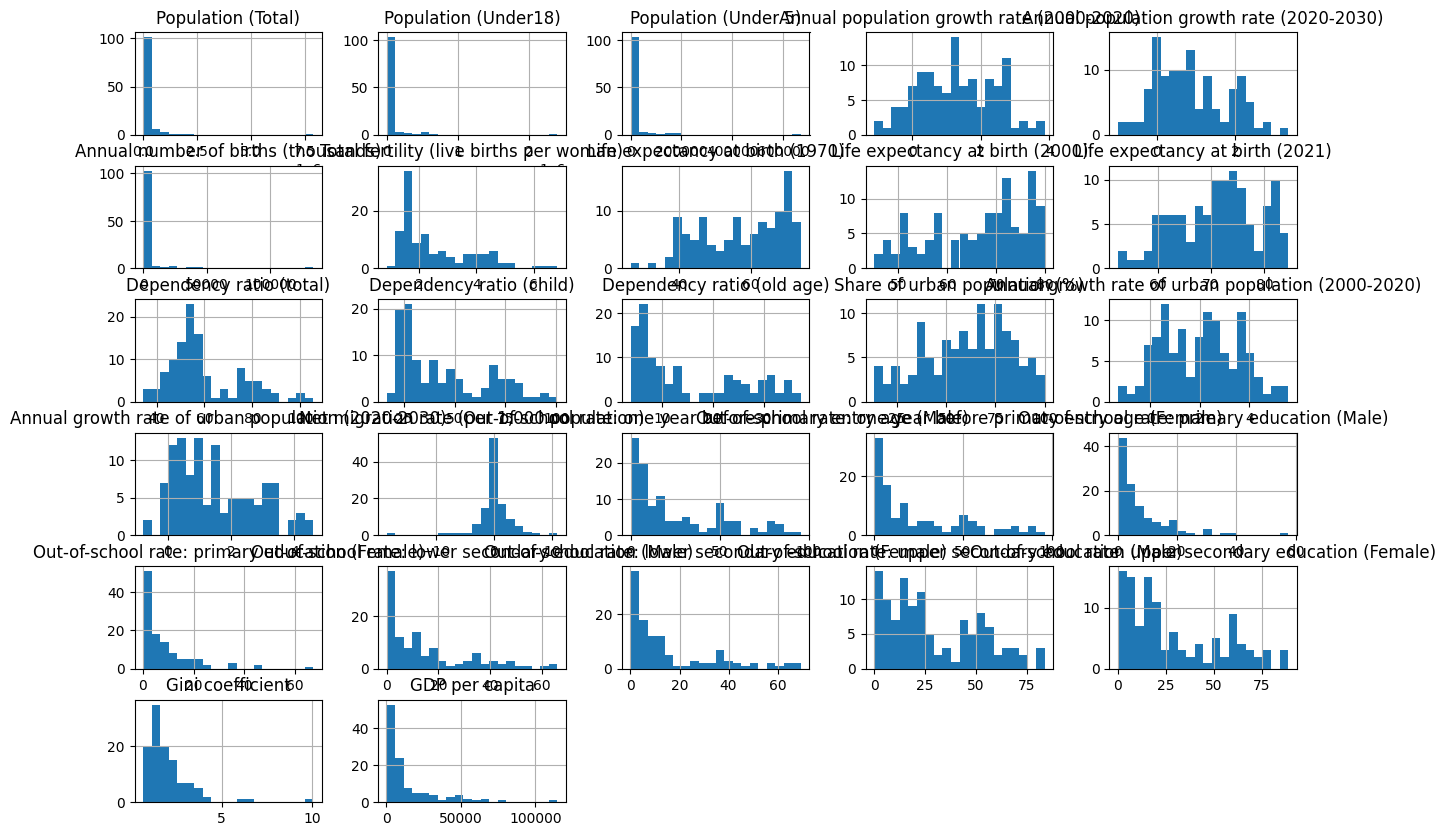

In [82]:
# Plot histograms for numerical columns
df.hist(bins=20, figsize=(15, 10))
plt.show()


In [141]:
# Compute the correlation matrix for numerical columns
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()

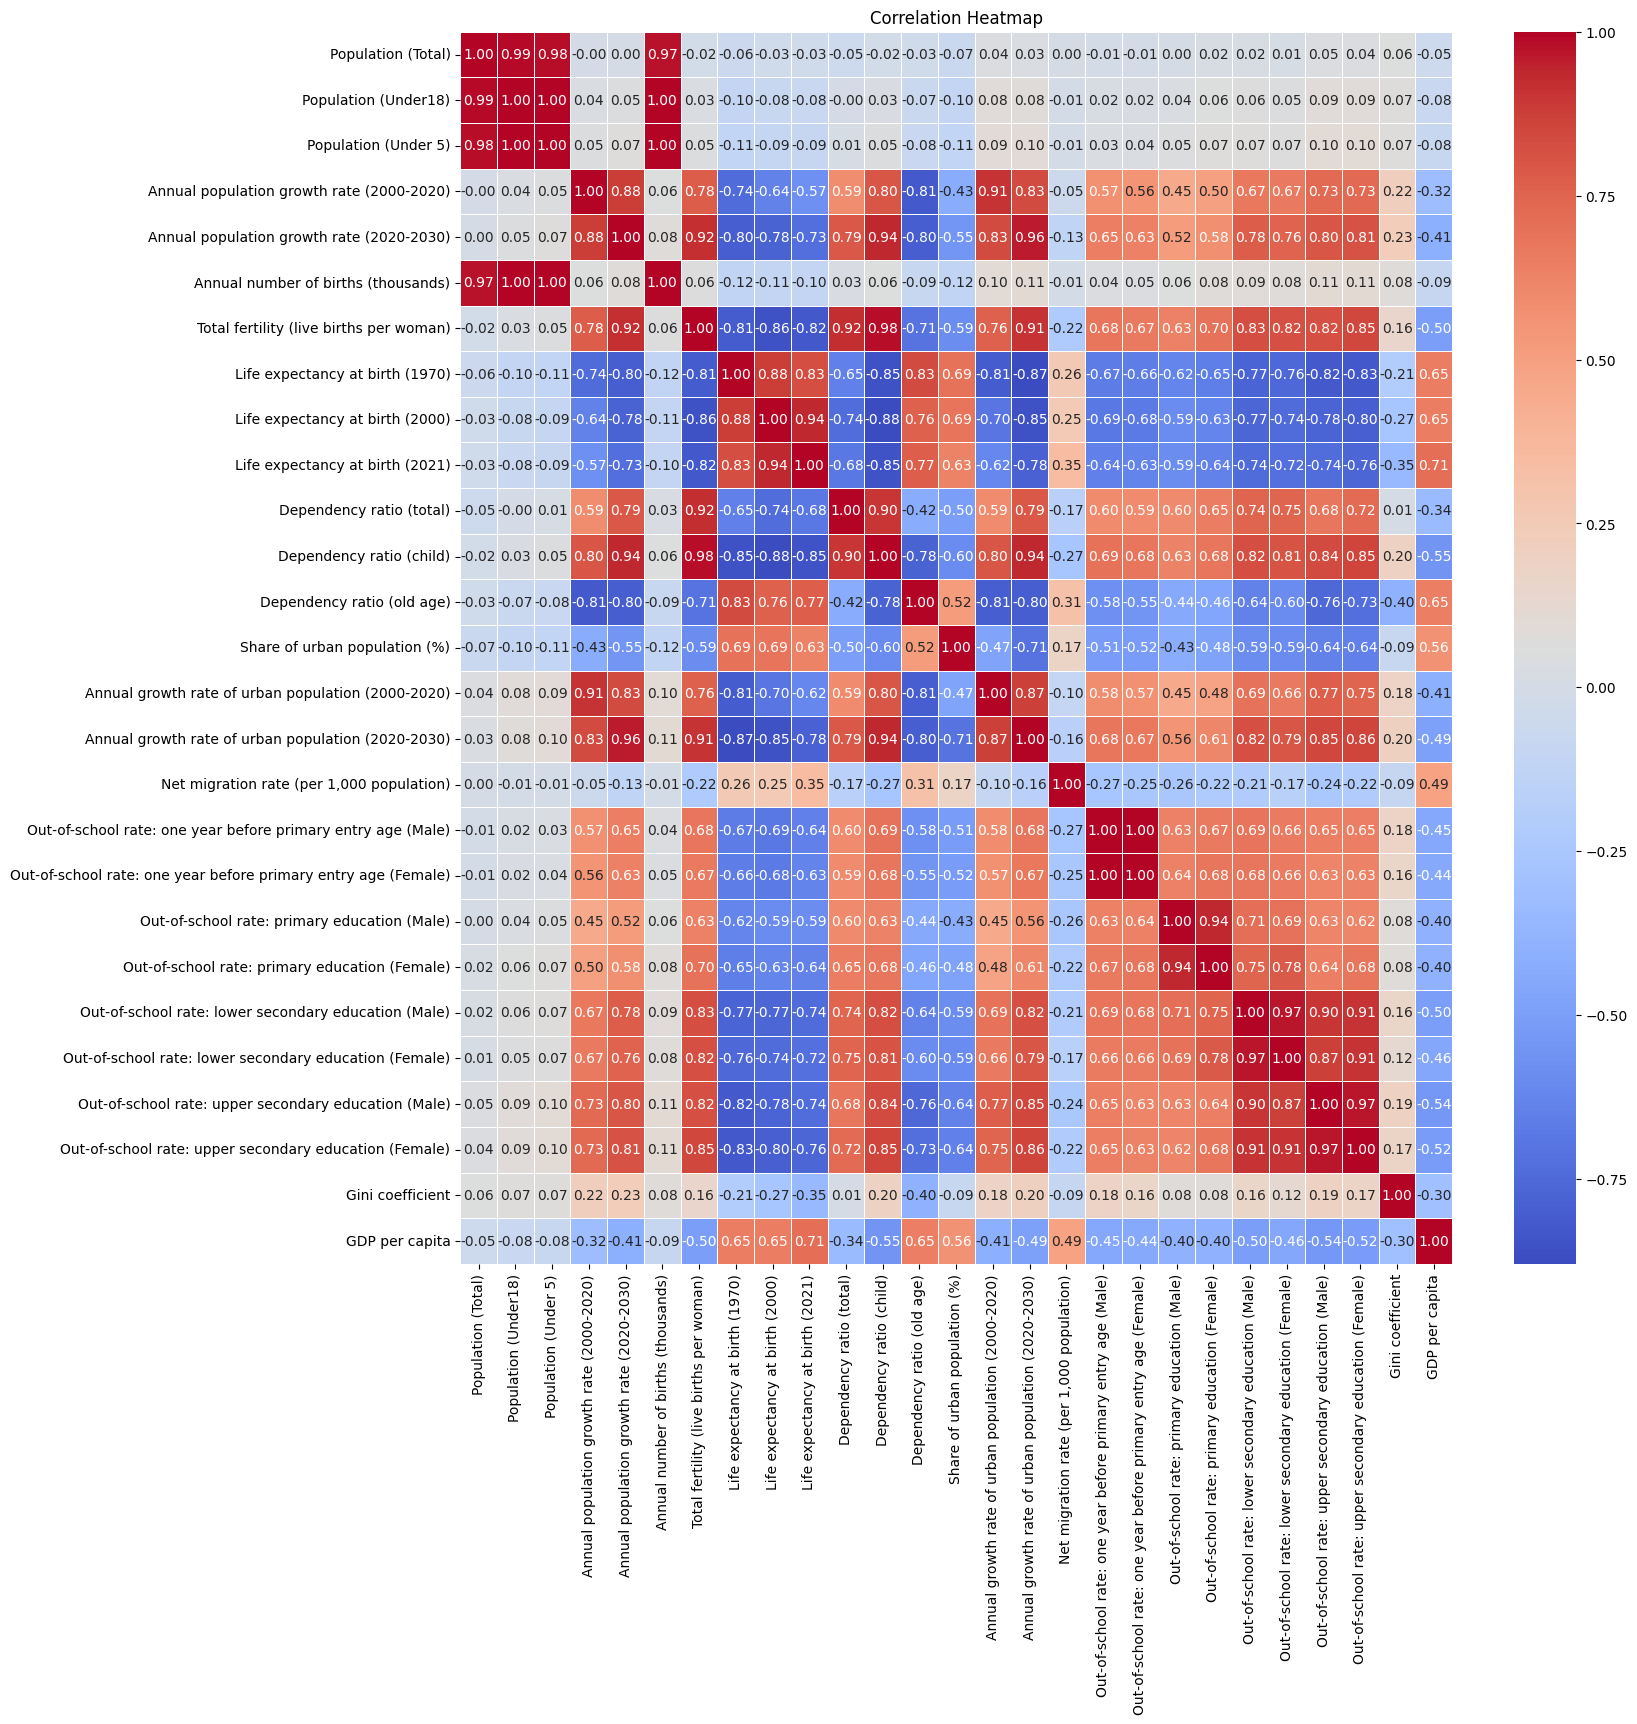

In [91]:
# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [88]:
# Select the columns of interest
selected_columns = ['Population (Total)', 'GDP per capita', 'Life expectancy at birth (2021)']

# Subset the dataframe with only these columns
df_selected = df[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix_selected = df_selected.corr()


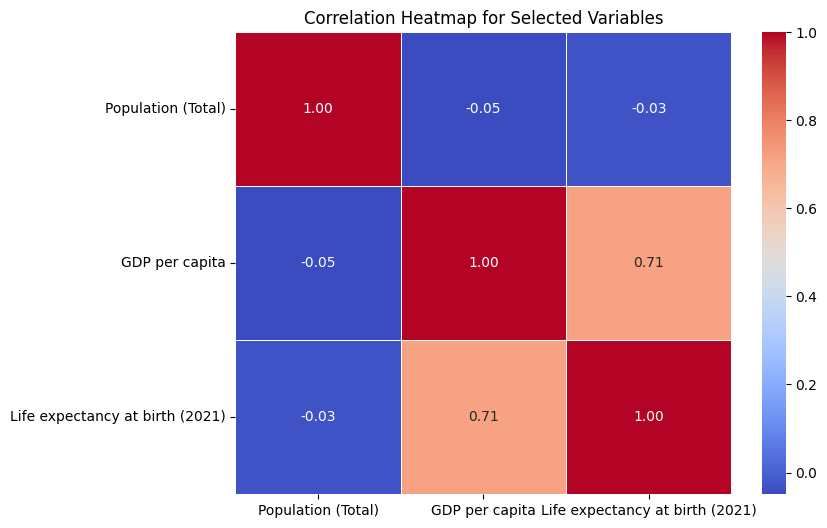

In [89]:
# Create the heatmap for the selected variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

To calculate the mean for a specific column and then identify the countries (or regions) that are above or below the mean, you can follow these steps:

Step-by-Step Process
Select the column of interest.
Calculate the mean of that column.
Identify which countries are above or below the mean.

In [92]:
# 1. Calculate the mean for 'GDP per capita'
mean_gdp = df['GDP per capita'].mean()
print(f"Mean GDP per capita: {mean_gdp}")


Mean GDP per capita: 14344.157910628948


In [97]:
# 2. Identify Countries Above and Below the Mean

# Countries with GDP above the mean
above_mean = df[df['GDP per capita'] > mean_gdp]

# Display the results
print("Countries with GDP above the mean:")
print(above_mean[['Countries and regions', 'GDP per capita']])




Countries with GDP above the mean:
                  Countries and regions  GDP per capita
9                             Australia     55057.20470
10                              Austria     50121.55421
15                             Barbados     18148.24493
17                              Belgium     46345.40329
36                                Chile     14896.45387
46                               Cyprus     27858.37100
47                              Czechia     23489.83866
50                              Denmark     60213.09215
59                              Estonia     23717.79945
63                              Finland     48771.37380
64                               France     40496.36403
68                              Germany     46467.51620
70                               Greece     19580.98833
79                              Hungary     16729.78037
80                              Iceland     67084.08371
87                                Italy     33225.64849
94           

In [98]:
# Countries with GDP below the mean
below_mean = df[df['GDP per capita'] < mean_gdp]

print("\nCountries with GDP below the mean:")
print(below_mean[['Countries and regions', 'GDP per capita']])


Countries with GDP below the mean:
           Countries and regions  GDP per capita
1                        Albania     5353.244856
8                        Armenia     4622.733493
11                    Azerbaijan     4793.125559
16                       Belarus     6697.968615
18                        Belize     4815.163711
..                           ...             ...
210           Sub-Saharan Africa     1604.330000
211  Eastern and Southern Africa     1628.436000
212      West and Central Africa     1578.196000
213    Least developed countries     1078.147000
214                        World    11561.780000

[79 rows x 2 columns]


In [99]:
# Sort countries by GDP per capita
sorted_df = df[['Countries and regions', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False)
print(sorted_df)


    Countries and regions  GDP per capita
104            Luxembourg   114685.168400
133                Norway    75419.634870
80                Iceland    67084.083710
208         North America    63368.730000
50                Denmark    60213.092150
..                    ...             ...
100               Liberia      621.892954
129                 Niger      553.895050
160          Sierra Leone      527.533634
171                 Sudan      441.505603
29                Burundi      261.247473

[114 rows x 2 columns]


In [100]:
# Calculate the mean for 'GDP per capita'
mean_gdp = df['GDP per capita'].mean()
print(f"Mean GDP per capita: {mean_gdp}")


Mean GDP per capita: 14344.157910628948


In [102]:
#2. Sort the Data and Get the Top 3 Highest and Bottom 3 Lowest
# Now, we'll sort the data and select the top and bottom 3 values relative to the mean.

# Sort the dataframe by 'GDP per capita' in descending order for top 3
top_3 = df[['Countries and regions', 'GDP per capita']].sort_values(by='GDP per capita', ascending=False).head(3)

# Display the results
print("Top 3 countries with the highest GDP per capita:")
print(top_3)


Top 3 countries with the highest GDP per capita:
    Countries and regions  GDP per capita
104            Luxembourg    114685.16840
133                Norway     75419.63487
80                Iceland     67084.08371


In [103]:
# Sort the dataframe by 'GDP per capita' in ascending order for bottom 3
bottom_3 = df[['Countries and regions', 'GDP per capita']].sort_values(by='GDP per capita', ascending=True).head(3)

# Display the results
print("\nTop 3 countries with the lowest GDP per capita:")
print(bottom_3)



Top 3 countries with the lowest GDP per capita:
    Countries and regions  GDP per capita
29                Burundi      261.247473
171                 Sudan      441.505603
160          Sierra Leone      527.533634


In [104]:
# First of all we calculate the difference from the mean for each top and bottom country
top_3['Difference from Mean'] = top_3['GDP per capita'] - mean_gdp
bottom_3['Difference from Mean'] = bottom_3['GDP per capita'] - mean_gdp

# Then we display the results with the difference from the mean
print("\nTop 3 countries with the highest GDP per capita and their difference from the mean:")
print(top_3)

print("\nTop 3 countries with the lowest GDP per capita and their difference from the mean:")
print(bottom_3)



Top 3 countries with the highest GDP per capita and their difference from the mean:
    Countries and regions  GDP per capita  Difference from Mean
104            Luxembourg    114685.16840         100341.010489
133                Norway     75419.63487          61075.476959
80                Iceland     67084.08371          52739.925799

Top 3 countries with the lowest GDP per capita and their difference from the mean:
    Countries and regions  GDP per capita  Difference from Mean
29                Burundi      261.247473         -14082.910438
171                 Sudan      441.505603         -13902.652307
160          Sierra Leone      527.533634         -13816.624276


Steps for Visualizing the Top 3 and Bottom 3 Countries Relative to the Mean in a Bar Plot

1. Calculate the mean for the column (already done).
2. Select the top and bottom 3 countries based on the column value.
3. Create a bar plot to show the values of the top and bottom countries.

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/d0/79k9fjfd4ys3_bpjhj7wbxbc0000gn/T/ipykernel_2695/2442540197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_3, x='Countries and regions', y='GDP per capita', palette='coolwarm')


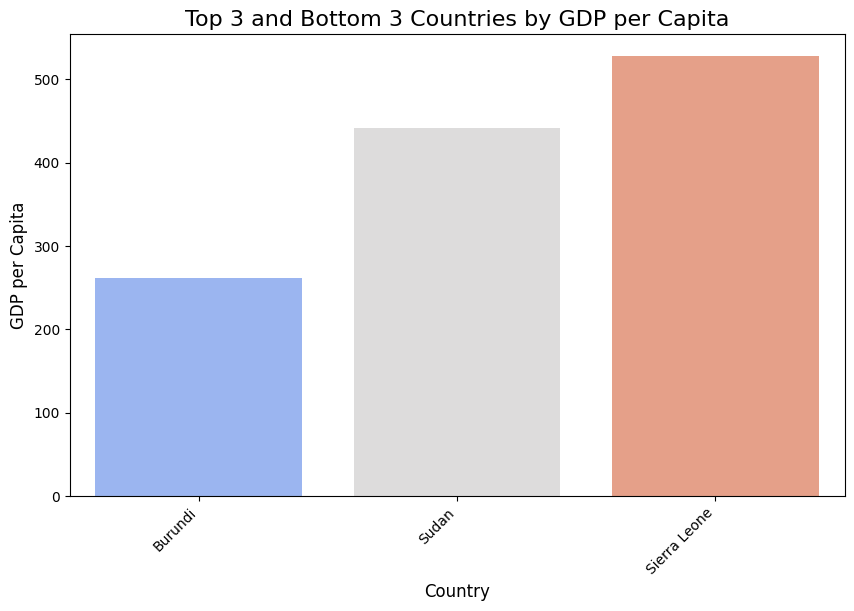

In [109]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_3, x='Countries and regions', y='GDP per capita', palette='coolwarm')

# Add labels and title
plt.title('Top 3 and Bottom 3 Countries by GDP per Capita', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.show()

/var/folders/d0/79k9fjfd4ys3_bpjhj7wbxbc0000gn/T/ipykernel_2695/1681363912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3, x='Countries and regions', y='GDP per capita', palette='coolwarm')


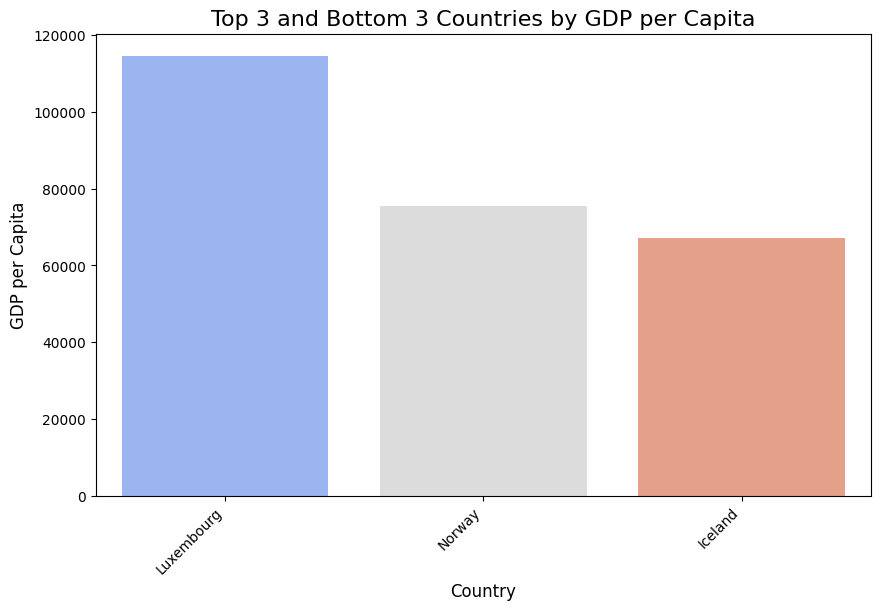

In [111]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3, x='Countries and regions', y='GDP per capita', palette='coolwarm')

# Add labels and title
plt.title('Top 3 and Bottom 3 Countries by GDP per Capita', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.show()

Do the same thing for life expectancy

In [115]:
# 1. Calculate the mean for 'Life expectancy at birth (2021)'
mean_life_expectancy = df['Life expectancy at birth (2021)'].mean()
print(f"Life expectancy at birth (2021): {mean_life_expectancy}")

Life expectancy at birth (2021): 71.16038245614035


In [117]:

# Countries above the mean
above_mean_life = df[df['Life expectancy at birth (2021)'] > mean_life_expectancy]

# Display the results
print("\nCountries with Life Expectancy above the mean:")
print(above_mean_life[['Countries and regions', 'Life expectancy at birth (2021)']])




Countries with Life Expectancy above the mean:
               Countries and regions  Life expectancy at birth (2021)
1                            Albania                          76.4626
8                            Armenia                          72.0431
9                          Australia                          84.5265
10                           Austria                          81.5797
15                          Barbados                          77.5714
16                           Belarus                          72.4380
17                           Belgium                          81.8787
20                            Bhutan                          71.8150
22            Bosnia and Herzegovina                          75.3003
24                            Brazil                          72.7504
27                          Bulgaria                          71.7980
30                        Cabo Verde                          74.0518
36                             Chile      

In [118]:
# Countries below the mean

below_mean_life = df[df['Life expectancy at birth (2021)'] < mean_life_expectancy]

# Display the results

print("\nCountries with Life Expectancy below the mean:")
print(below_mean_life[['Countries and regions', 'Life expectancy at birth (2021)']])



Countries with Life Expectancy below the mean:
                  Countries and regions  Life expectancy at birth (2021)
11                           Azerbaijan                          69.3658
18                               Belize                          70.4697
19                                Benin                          59.8210
21     Bolivia (Plurinational State of)                          63.6304
23                             Botswana                          61.1409
28                         Burkina Faso                          59.2696
29                              Burundi                          61.6627
31                             Cambodia                          69.5835
32                             Cameroon                          60.3334
35                                 Chad                          52.5254
39                              Comoros                          63.4174
43                        Côte d'Ivoire                          58.5983
51 

In [120]:
#2. Sort the Data and Get the Top 5 Highest and Bottom 5 Lowest
# Now, we'll sort the data and select the top 5 and bottom 5 values relative to the mean.

# Sort the dataframe by 'GDP per capita' in descending order for top 3
top_5 = df[['Countries and regions', 'Life expectancy at birth (2021)']].sort_values(by='Life expectancy at birth (2021)', ascending=False).head(5)

# Display the results
print("Top 5 countries with the highest Life expectancy at birth (2021):")
print(top_5)


Top 5 countries with the highest Life expectancy at birth (2021):
    Countries and regions  Life expectancy at birth (2021)
9               Australia                          84.5265
145     Republic of Korea                          83.6978
133                Norway                          83.2339
168                 Spain                          83.0100
87                  Italy                          82.8502


In [121]:
# Sort the dataframe by 'Life expectancy at birth (2021)' in ascending order for bottom 5
bottom_5 = df[['Countries and regions', 'Life expectancy at birth (2021)']].sort_values(by='Life expectancy at birth (2021)', ascending=True).head(5)

# Display the results
print("\nTop 5 countries with the lowest Life expectancy at birth (2021):")
print(bottom_5)



Top 5 countries with the lowest Life expectancy at birth (2021):
       Countries and regions  Life expectancy at birth (2021)
35                      Chad                          52.5254
99                   Lesotho                          53.0620
167              South Sudan                          54.9752
212  West and Central Africa                          57.1270
43             Côte d'Ivoire                          58.5983


In [124]:
# We first calculate the difference from the mean for each top and bottom country
top_5['Difference from Mean'] = top_5['Life expectancy at birth (2021)'] - mean_life_expectancy
bottom_5['Difference from Mean'] = bottom_5['Life expectancy at birth (2021)'] - mean_life_expectancy

# Then we also display the results with the difference from the mean
print("\nTop 5 countries with the highest Life expectancy at birth (2021) and their difference from the mean:")
print(top_5)

print("\nTop 5 countries with the lowest Life expectancy at birth (2021) and their difference from the mean:")
print(bottom_5)



Top 5 countries with the highest Life expectancy at birth (2021) and their difference from the mean:
    Countries and regions  Life expectancy at birth (2021)  \
9               Australia                          84.5265   
145     Republic of Korea                          83.6978   
133                Norway                          83.2339   
168                 Spain                          83.0100   
87                  Italy                          82.8502   

     Difference from Mean  
9               13.366118  
145             12.537418  
133             12.073518  
168             11.849618  
87              11.689818  

Top 5 countries with the lowest Life expectancy at birth (2021) and their difference from the mean:
       Countries and regions  Life expectancy at birth (2021)  \
35                      Chad                          52.5254   
99                   Lesotho                          53.0620   
167              South Sudan                          54.9752

/var/folders/d0/79k9fjfd4ys3_bpjhj7wbxbc0000gn/T/ipykernel_2695/753943762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5, x='Countries and regions', y='Life expectancy at birth (2021)', palette='coolwarm')


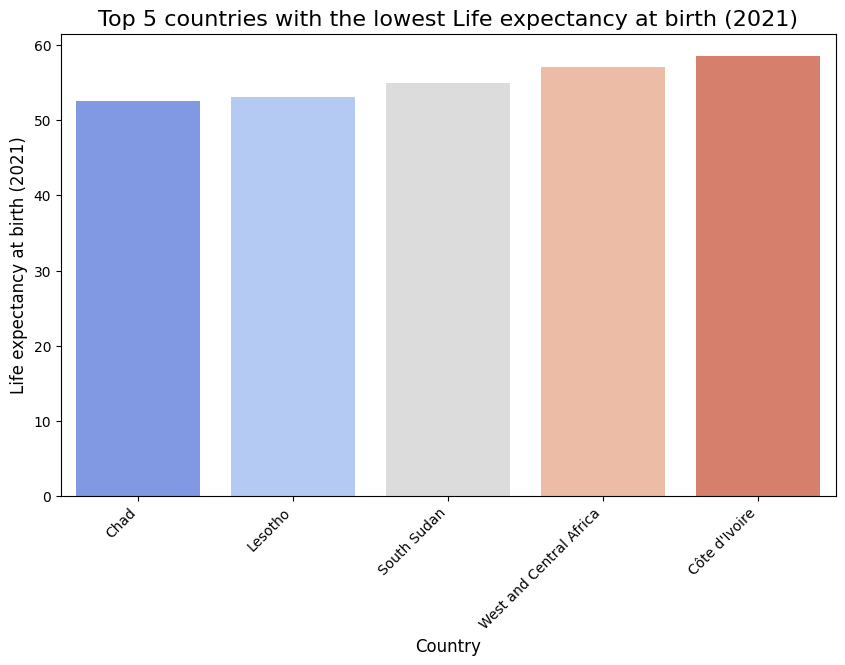

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_5, x='Countries and regions', y='Life expectancy at birth (2021)', palette='coolwarm')

# Add labels and title
plt.title('Top 5 countries with the lowest Life expectancy at birth (2021)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life expectancy at birth (2021)', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.show()


/var/folders/d0/79k9fjfd4ys3_bpjhj7wbxbc0000gn/T/ipykernel_2695/4169704078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Countries and regions', y='Life expectancy at birth (2021)', palette='coolwarm')


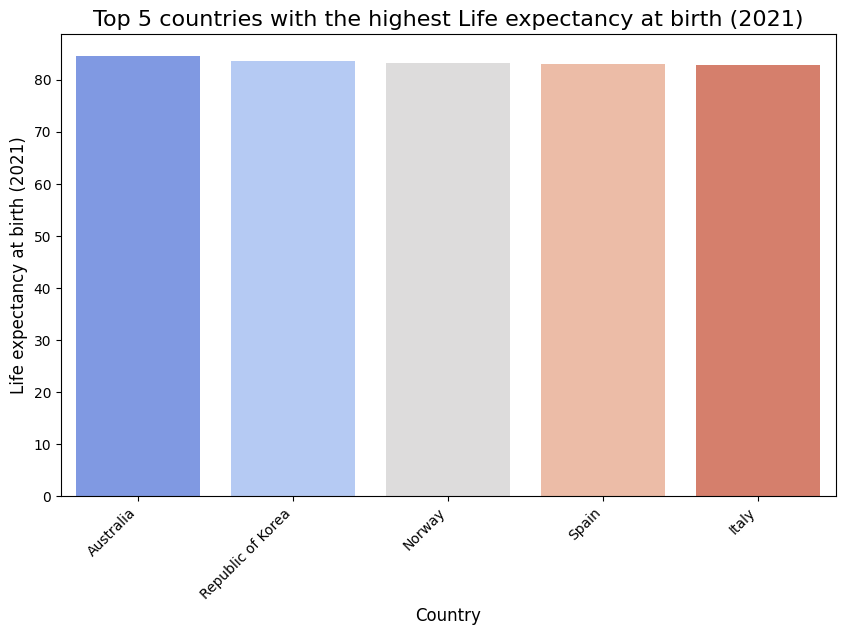

In [128]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5, x='Countries and regions', y='Life expectancy at birth (2021)', palette='coolwarm')

# Add labels and title
plt.title('Top 5 countries with the highest Life expectancy at birth (2021)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life expectancy at birth (2021)', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.show()

Steps for Creating Boxplots for Dependency Ratios
1. Calculate the boxplots for the Dependency ratio (total), Dependency ratio (child), and Dependency ratio (old) columns.
2. Visualize the boxplots using seaborn or matplotlib.

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt


Now create a Boxplot for Dependency Ratios

We can plot the boxplot for all three ratios (total, child, and old) in one figure to make a comparison.

In [137]:
# Create a list of the three columns for dependency ratios
dependency_columns = ['Dependency ratio (total)', 'Dependency ratio (child)', 'Dependency ratio (old age)']

In [136]:
print(df.columns)


Index(['Countries and regions', 'Population (Total)', 'Population (Under18)',
       'Population (Under 5)', 'Annual population growth rate (2000-2020)',
       'Annual population growth rate (2020-2030)',
       'Annual number of births (thousands)',
       'Total fertility (live births per woman)',
       'Life expectancy at birth (1970)', 'Life expectancy at birth (2000)',
       'Life expectancy at birth (2021)', 'Dependency ratio (total)',
       'Dependency ratio (child)', 'Dependency ratio (old age)',
       'Share of urban population (%)',
       'Annual growth rate of urban population (2000-2020)',
       'Annual growth rate of urban population (2020-2030)',
       'Net migration rate (per 1,000 population)',
       'Out-of-school rate: one year before primary entry age (Male)',
       'Out-of-school rate: one year before primary entry age (Female)',
       'Out-of-school rate: primary education (Male)',
       'Out-of-school rate: primary education (Female)',
       'Out-of-s

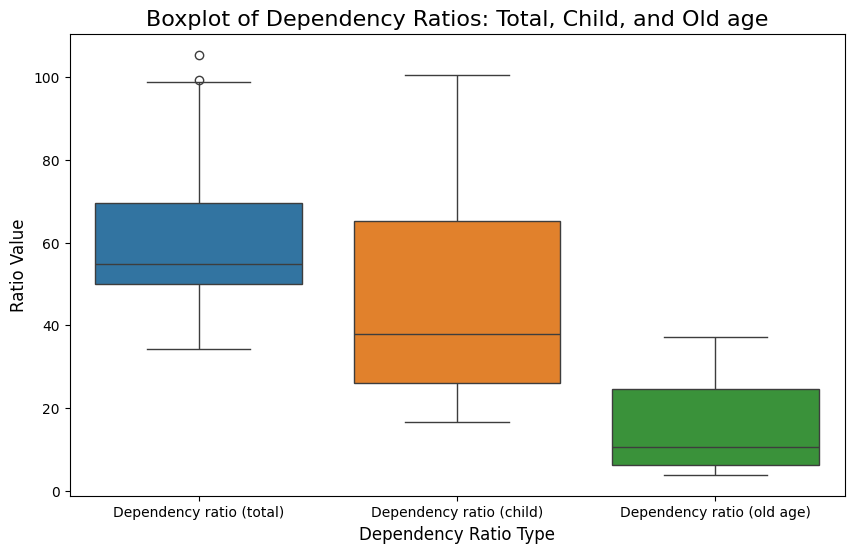

In [140]:
# We firstly reate a boxplot to compare the three dependency ratios
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[dependency_columns])

# We modify it as we like, adding title and labels
plt.title('Boxplot of Dependency Ratios: Total, Child, and Old age', fontsize=16)
plt.xlabel('Dependency Ratio Type', fontsize=12)
plt.ylabel('Ratio Value', fontsize=12)

# Lastly, we show the plot
plt.show()